# Linear Regression

## Introduction

Linear regression is a statistical method and a fundamental type of predictive analytical model used to describe the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the input variables (X) and the single output variable (y).

### Mathematical Foundation

The general form of a linear regression model is:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_p + \epsilon$$

Where:
- $y$ is the dependent variable (response/target)
- $x_1, x_2, ..., x_p$ are the independent variables (features/covariates)
- $\beta_0$ is the intercept (bias term)
- $\beta_1, \beta_2, ..., \beta_n$ are the coefficients (weights)
- $\epsilon$ is the error term (residual)

We can also write the model in matrix form:

$$y = X\beta + \epsilon$$

Where:
- $y$ has the shape of $(n, 1)$
- $X$ has the shape of $(n, p + 1)$: we add a column of 1s to the independent variables to account for the intercept
- $\beta$ has the shape of $(p + 1, 1)$
- $\epsilon$ has the shape of $(n, 1)$

### Key Assumptions of Linear Regression

1. **Linearity**: The relationship between X and the mean of y is linear
2. **Independence**: Observations are independent of each other
3. **Homoscedasticity**: The variance of residual is the same for any value of X
4. **Normality**: The residuals are normally distributed with a mean 0 and fixed variance
5. **No multicollinearity**: Independent variables are not highly correlated with each other

In this notebook, we will use the "Auto MPG" dataset to demonstrate the basic concepts of linear regression.

## The Data: Auto MPG Dataset

The "Auto MPG" dataset is one of the classic datasets available in the UCI Machine Learning Repository. It contains city-cycle fuel consumption estimates for various automobiles produced in the 1970s and 1980s. It is a commonly used dataset for regression analysis tasks in machine learning.

### Data Set Information

#### Variable Descriptions:

* **mpg** (continuous): Miles per gallon - our target variable
* **cylinders** (multi-valued discrete): Number of cylinders (3, 4, 5, 6, 8)
* **displacement** (continuous): Engine displacement in cubic inches
* **horsepower** (continuous): Engine horsepower
* **weight** (continuous): Vehicle weight in pounds
* **acceleration** (continuous): Time to accelerate from 0-60 mph in seconds
* **model year** (multi-valued discrete): Model year (70-82, representing 1970-1982)
* **origin** (multi-valued discrete): Origin of car (1: USA, 2: Europe, 3: Japan)
* **car name** (string): Name of the car (unique for each instance)

In [1]:
# Import necessary libraries for linear regression analysis
from typing import List
from typing import Tuple
from typing import Union

# Data manipulation and numerical computation
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Progress bar for iterations
from tqdm import tqdm

# Configure visualization settings for better readability
sns.set_theme(font_scale=1.5)  # Increase font size for better visibility
sns.set_style("whitegrid", {"grid.linestyle": "--"})  # Set grid style with dashed lines

In [2]:
# Load the Auto MPG dataset from GitHub repository
# The dataset contains information about cars from the 1970s and 1980s
data = pd.read_csv("https://raw.githubusercontent.com/changyaochen/MECE4520/master/data/auto_mpg.csv")

# Let's drop any na values for now
data = data.dropna()

# Display the first 5 rows to understand the data structure
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


## Simple Linear Regression

### Definition

Simple linear regression refers to the special case of linear regression where there is only a single independent variable. It models the relationship between two variables by fitting a linear equation to observed data.

The model takes the form:
$$y = \beta_0 + \beta_1 x + \epsilon$$

### Objective: Least Squares Method

The goal is to find the best values for $\beta_0$ and $\beta_1$ that minimize the sum of squared residuals (SSE):

$$SSE = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i))^2$$

### Mathematical Derivation

Using calculus to minimize SSE, we take partial derivatives with respect to $\beta_0$ and $\beta_1$ and set them equal to zero:

$$\frac{\partial SSE}{\partial \beta_0} = -2\sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i) = 0$$

$$\frac{\partial SSE}{\partial \beta_1} = -2\sum_{i=1}^{n} x_i(y_i - \beta_0 - \beta_1 x_i) = 0$$

Solving these normal equations yields:

$$\beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2} = \frac{Cov(x,y)}{Var(x)}$$

$$\beta_0 = \bar{y} - \beta_1 \bar{x}$$

### Model Evaluation: R-squared

The coefficient of determination (R²) measures the proportion of variance in the dependent variable that's predictable from the independent variable:

$$R^2 = 1 - \frac{SSE}{SST} = 1 - \frac{\sum(y_i - \hat{y}_i)^2}{\sum(y_i - \bar{y})^2}$$

Where:
- SSE = Error Sum of Squared  (residual sum of squares)
- SST = Total Sum of Squares (total variation in y)
- R² ranges from 0 to 1, with 1 indicating perfect prediction

### Implementation

Below we will implement simple linear regression using the "Auto MPG" dataset, predicting MPG based on vehicle weight:

Simple Linear Regression Results
Intercept (β₀): 46.2165
Slope (β₁): -0.0076
R-squared: 0.6926

Interpretation:
- For every 1 pound increase in weight, MPG decreases by 0.0076
- The model explains 69.3% of the variance in MPG


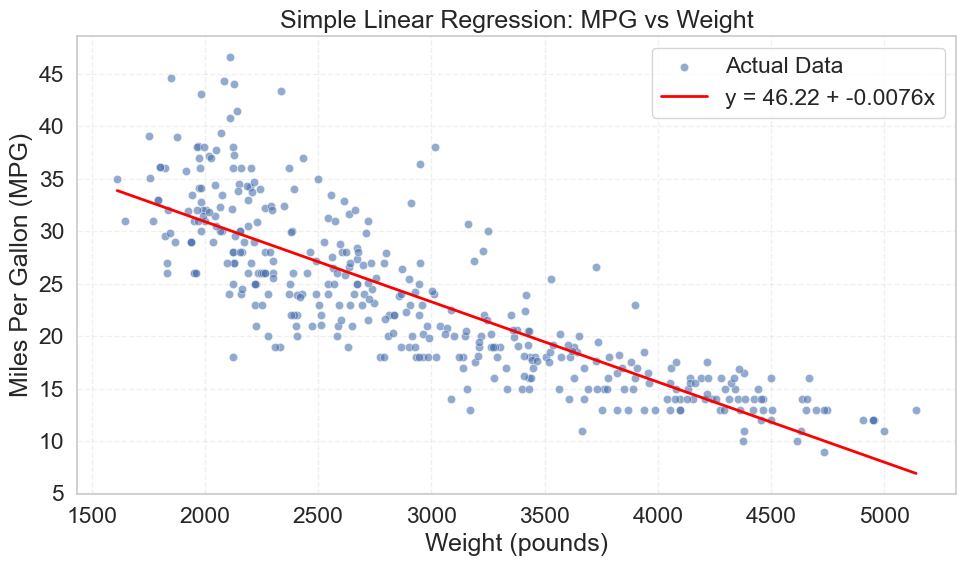

In [3]:
# Extract dependent (target) and independent (feature) variables
# We choose weight as our predictor since it showed strong correlation with MPG
y = data["mpg"]  # Dependent variable: fuel efficiency
x = data["weight"]  # Independent variable: vehicle weight

def simple_linear_regression(
    x: Union[List, np.ndarray, pd.Series],
    y: Union[List, np.ndarray, pd.Series]) -> Tuple[float, float]:
    """
    Implements simple linear regression using the closed-form solution.

    This function calculates the optimal parameters (intercept and slope)
    for a simple linear regression model using the method of least squares.

    Args:
        x: Independent variable values
        y: Dependent variable values

    Returns:
        tuple: (beta_0, beta_1) where beta_0 is the intercept and beta_1 is the slope
    """
    # Calculate slope using the formula: β₁ = Cov(x,y) / Var(x)
    # np.cov returns a covariance matrix, [0][1] gets covariance between x and y
    # [0][0] would be variance of x
    beta_1 = np.cov(x, y)[0][1] / np.cov(x, x)[0][0]

    # Calculate intercept using: β₀ = ȳ - β₁x̄
    # This ensures the regression line passes through the point (x̄, ȳ)
    beta_0 = np.mean(y) - beta_1 * np.mean(x)

    return beta_0, beta_1

# Fit the simple linear regression model
beta_0, beta_1 = simple_linear_regression(x=x, y=y)

# Model Evaluation: Calculate R-squared
# R² measures how well the model explains the variance in the data

# Step 1: Generate predictions using the fitted model
y_pred = beta_0 + beta_1 * x

# Step 2: Calculate Total Sum of Squares (SST)
# This represents the total variance in the dependent variable
SST = np.sum(np.square(y - np.mean(y)))

# Step 3: Calculate residuals (errors between actual and predicted values)
residual = y - y_pred

# Step 4: Calculate Sum of Squared Errors (SSE)
# This represents the unexplained variance
SSE = np.sum(np.square(residual))

# Step 5: Calculate R-squared
# R² = 1 - (unexplained variance / total variance)
r2 = 1 - SSE / SST

# Display the regression coefficients and model performance
print("="*50)
print("Simple Linear Regression Results")
print("="*50)
print(f"Intercept (β₀): {beta_0:5.4f}")
print(f"Slope (β₁): {beta_1:5.4f}")
print(f"R-squared: {r2:5.4f}")
print(f"\nInterpretation:")
print(f"- For every 1 pound increase in weight, MPG decreases by {abs(beta_1):.4f}")
print(f"- The model explains {r2*100:.1f}% of the variance in MPG")

# Visualize the regression results
plt.figure(figsize=(10, 6))

# Create a range of x values for plotting the regression line
x_range = np.linspace(start=np.min(x), stop=np.max(x), num=100)

# Plot the actual data points
sns.scatterplot(x="weight", y="mpg", data=data, alpha=0.6, label="Actual Data")

# Plot the regression line
sns.lineplot(x=x_range, y=(beta_0 + beta_1 * x_range),
             color="red", linewidth=2, label=f"y = {beta_0:.2f} + {beta_1:.4f}x")

# Add labels and title
plt.xlabel("Weight (pounds)")
plt.ylabel("Miles Per Gallon (MPG)")
plt.title("Simple Linear Regression: MPG vs Weight")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Residual Analysis

### Why Residual Analysis?

Equally important to, if not more important than, the model fitting, is the model/error analysis. Residual analysis is a critical diagnostic tool in regression analysis that helps us:

1. **Validate Assumptions**: Check if the linear regression assumptions are met
2. **Identify Problems**: Detect issues like heteroscedasticity, non-linearity, or outliers


### What are Residuals?

Residuals are the differences between observed values and predicted values:
$$\text{Residual}_i = y_i - \hat{y}_i$$

Where:
- $y_i$ is the actual observed value
- $\hat{y}_i$ is the predicted value from our model

### Assumptions to Check

For linear regression to be valid, residuals should:
1. **Be normally distributed**: The residuals should follow a normal distribution with mean 0
2. **Have constant variance (Homoscedasticity)**: The spread of residuals should be roughly equal across all levels of the predictor
3. **Be independent**: No pattern or correlation among residuals

### Interpreting Residual Plots

Below we will examine the distribution of residuals. A good residual plot should show:
- A histogram that resembles a bell curve (normal distribution)
- Centered around zero
- Symmetric distribution without heavy skew
- No extreme outliers

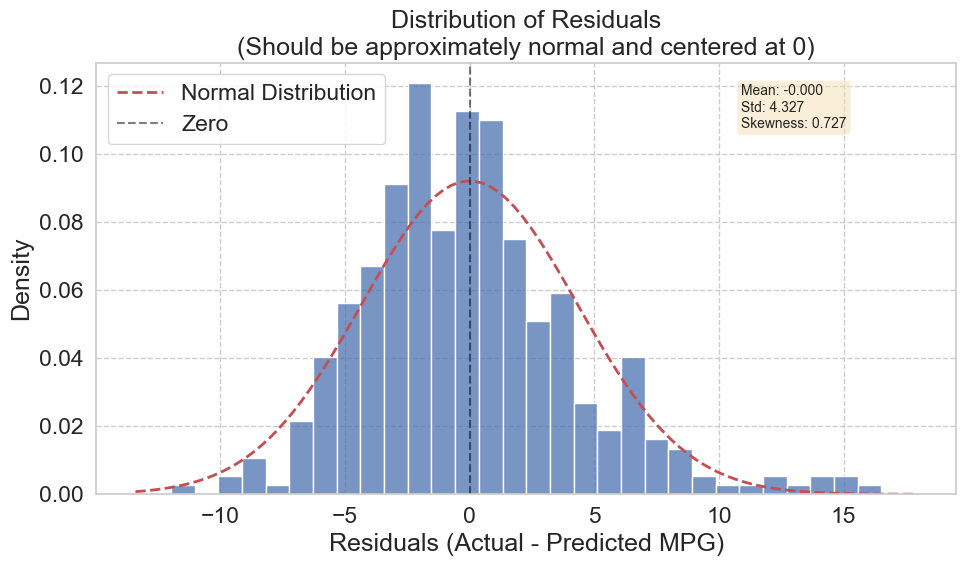

In [4]:
from scipy import stats

# Residual analysis: Examining the distribution of errors
# This helps verify if our linear regression assumptions are met

plt.figure(figsize=(10, 6))

# Create histogram with kernel density estimate
sns.histplot(residual, bins=30, kde=False, stat="density")

# Add a normal distribution overlay for comparison
mu, std = residual.mean(), residual.std()
xmin, xmax = plt.xlim()
x_range = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x_range, mu, std)
plt.plot(x_range, p, "r--", linewidth=2, label="Normal Distribution")

# Add vertical line at zero to show if residuals are centered
plt.axvline(x=0, color="black", linestyle="--", alpha=0.5, label="Zero")

# Labels and title
plt.xlabel("Residuals (Actual - Predicted MPG)")
plt.ylabel("Density")
plt.title("Distribution of Residuals\n(Should be approximately normal and centered at 0)")
plt.legend()

# Add statistics text
# Skewness is a measure of the asymmetry of the distribution
textstr = f"Mean: {mu:.3f}\nStd: {std:.3f}\nSkewness: {stats.skew(residual):.3f}"
plt.text(0.75, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment="top",
         bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))

plt.tight_layout()
plt.show()

## Statistical Inference in Linear Regression

### Understanding Parameter Uncertainty

An important aspect in linear regression is that the fitted parameters (e.g., intercept, slope) are just **point estimates** of the true population parameters. Here the "population" refers to the underlying stochastic process that generates the observed data.

### Key Concepts

1. **Point Estimates vs. True Parameters**
   - What we calculate, i.e. ($\hat{\beta}_0$, $\hat{\beta}_1$), are estimates based on our sample
   - The true parameters ($\beta_0$, $\beta_1$) exist in the population but are unknown
   - Different samples would give us different estimates

2. **Sampling Distribution**
   - If we repeatedly sample from the population and fit a model based on the sample, we'd get a distribution of parameter estimates
   - This distribution tells us about the uncertainty in our estimates
   - The spread of this distribution indicates the precision of our estimates

3. **Why This Matters**
   - Helps us understand the reliability of our predictions
   - Allows us to construct confidence intervals
   - Enables hypothesis testing (e.g., is the slope significantly different from zero?)

### Bootstrap Simulation

Below, we will run a simulation to demonstrate parameter uncertainty:
- In each trial, we randomly sample 20% of the full dataset
- We fit a simple linear regression to each sample
- We repeat this process 100 times
- This shows that the fitting parameters are random variables that vary with the sample

This bootstrap-like approach helps us:
1. Visualize the sampling distribution of parameters
2. Estimate the standard errors empirically
3. Understand how sample size affects parameter precision

Running bootstrap simulation...


Bootstrap samples: 100%|██████████| 100/100 [00:00<00:00, 4510.59it/s]



Plotting fitted lines from bootstrap samples...


Plotting lines: 100%|██████████| 100/100 [00:00<00:00, 196.83it/s]



Bootstrap Results Summary
Intercept: Mean = 46.304, Std = 1.649
Slope: Mean = -0.00769, Std = 0.00047
Note: Smaller standard deviations indicate more precise estimates


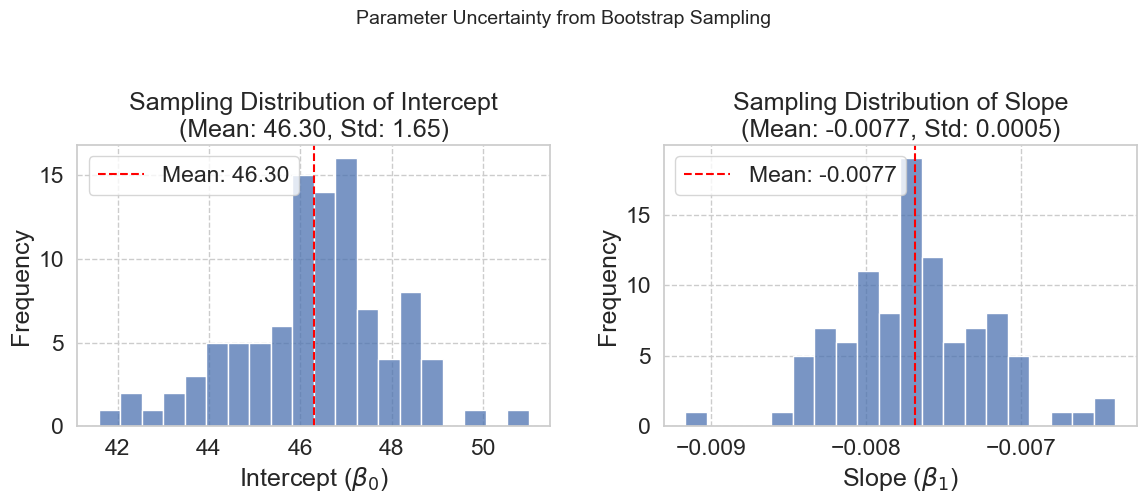

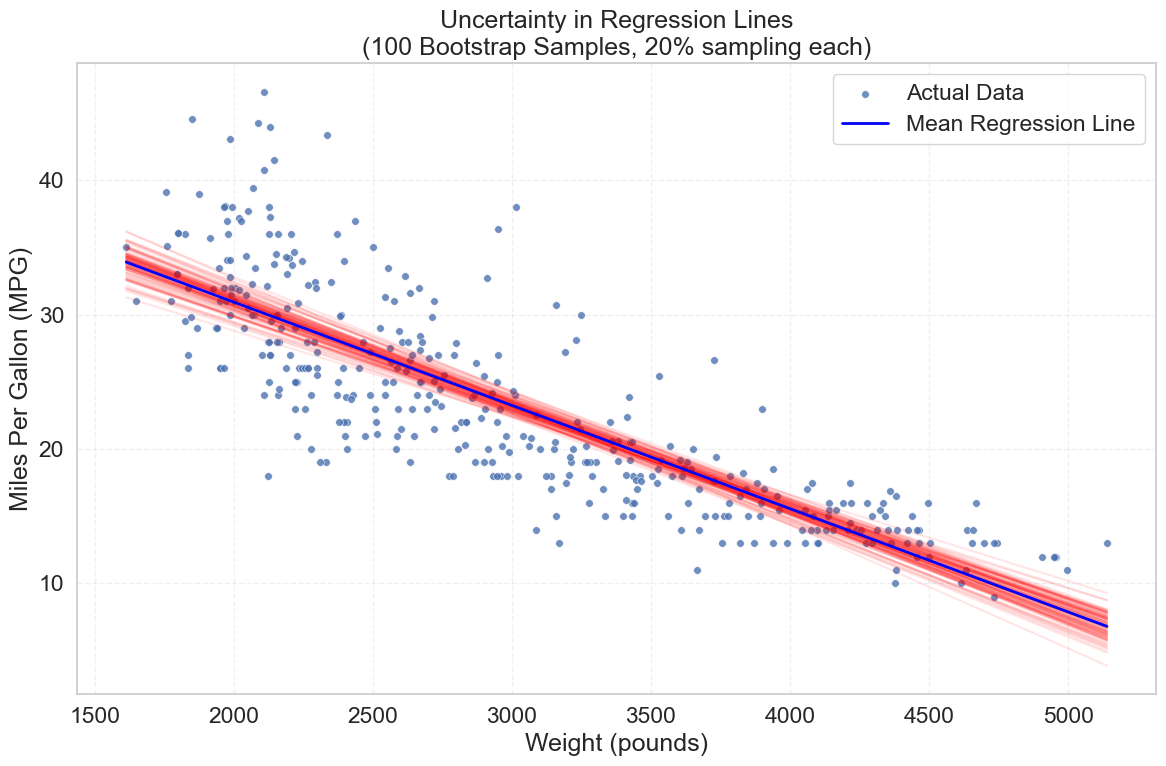

In [5]:
# Bootstrap simulation to understand parameter uncertainty
# This demonstrates that regression coefficients are random variables

# Set seed for reproducibility
np.random.seed(42)
n_trials = 100  # Number of bootstrap samples

# Storage for parameter estimates from each sample
beta_0s, beta_1s = [], []

# Run the bootstrap simulation
print("Running bootstrap simulation...")
for _ in tqdm(range(n_trials), desc="Bootstrap samples"):
    # Sample 20% of the data randomly
    sampling_proba = 0.2
    mask = np.random.choice([True, False], size=len(data),
                           p=[sampling_proba, 1 - sampling_proba])

    # Get the sampled data
    x_sampled, y_sampled = data[mask]["weight"], data[mask]["mpg"]

    # Fit linear regression on the sample
    beta_0, beta_1 = simple_linear_regression(x=x_sampled, y=y_sampled)

    # Store the parameter estimates
    beta_0s.append(beta_0)
    beta_1s.append(beta_1)

# Visualize the sampling distributions of parameters
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Intercept distribution
sns.histplot(beta_0s, ax=axes[0], kde=False, bins=20)
axes[0].axvline(x=np.mean(beta_0s), color="red", linestyle="--", label=f"Mean: {np.mean(beta_0s):.2f}")
axes[0].set_xlabel("Intercept ($\\beta_0$)")
axes[0].set_ylabel("Frequency")
axes[0].set_title(f"Sampling Distribution of Intercept\n(Mean: {np.mean(beta_0s):.2f}, Std: {np.std(beta_0s):.2f})")
axes[0].legend()

# Slope distribution
sns.histplot(beta_1s, ax=axes[1], kde=False, bins=20)
axes[1].axvline(x=np.mean(beta_1s), color="red", linestyle="--", label=f"Mean: {np.mean(beta_1s):.4f}")
axes[1].set_xlabel("Slope ($\\beta_1$)")
axes[1].set_ylabel("Frequency")
axes[1].set_title(f"Sampling Distribution of Slope\n(Mean: {np.mean(beta_1s):.4f}, Std: {np.std(beta_1s):.4f})")
axes[1].legend()

plt.suptitle("Parameter Uncertainty from Bootstrap Sampling", fontsize=14, y=1.02)
plt.tight_layout()

# Visualize all fitted lines to show prediction uncertainty
plt.figure(figsize=(12, 8))

# Create x range for plotting lines
x_range = np.linspace(start=np.min(data["weight"]), stop=np.max(data["weight"]), num=100)

# Plot all fitted lines with transparency to show distribution
print("\nPlotting fitted lines from bootstrap samples...")
for i in tqdm(range(len(beta_0s)), desc="Plotting lines"):
    sns.lineplot(x=x_range, y=(beta_0s[i] + beta_1s[i] * x_range),
                color="red", alpha=0.1, legend=False)

# Overlay the actual data points
sns.scatterplot(x="weight", y="mpg", data=data, alpha=0.8, s=30, label="Actual Data")

# Add the mean regression line
mean_beta_0 = np.mean(beta_0s)
mean_beta_1 = np.mean(beta_1s)
plt.plot(x_range, mean_beta_0 + mean_beta_1 * x_range,
         color="blue", linewidth=2, label="Mean Regression Line")

# Labels and title
plt.xlabel("Weight (pounds)")
plt.ylabel("Miles Per Gallon (MPG)")
plt.title("Uncertainty in Regression Lines\n(100 Bootstrap Samples, 20% sampling each)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Print summary statistics
print(f"\n{'='*50}")
print("Bootstrap Results Summary")
print(f"{'='*50}")
print(f"Intercept: Mean = {np.mean(beta_0s):.3f}, Std = {np.std(beta_0s):.3f}")
print(f"Slope: Mean = {np.mean(beta_1s):.5f}, Std = {np.std(beta_1s):.5f}")
print(f"Note: Smaller standard deviations indicate more precise estimates")

### Model (parameter) Confidence Intervals and Standard Errors

#### Standard Error of Coefficients

The standard error measures the precision of our parameter estimates. It tells us how much the estimates would vary if we repeated the experiment with different samples.

For simple linear regression, the standard errors are:

**Standard Error of Slope:**
$$SE(\hat{\beta}_1) = \sqrt{\frac{\sigma^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}}$$

**Standard Error of Intercept:**
$$SE(\hat{\beta}_0) = \sqrt{\sigma^2 \left(\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}\right)}$$

Where $\sigma^2$ is the variance of the residuals (estimated as $\frac{SSE}{n-2}$)

#### Confidence Intervals

A 95% confidence interval for the parameters is:
$$\hat{\beta} \pm z_{1 - \alpha/2} \times SE(\hat{\beta})$$

This means we're 95% confident that the true parameter lies within this interval.

#### Hypothesis Testing

We can test if a coefficient is significantly different from zero:
- Null hypothesis: $H_0: \beta_1 = 0$ (no relationship)
- Alternative: $H_a: \beta_1 \neq 0$ (relationship exists)
- Test statistic: $t = \frac{\hat{\beta}_1}{SE(\hat{\beta}_1)}$

Below we calculate the standard errors analytically:


In [6]:
# Calculate standard errors for confidence intervals
# These formulas come from statistical theory of linear regression

# Estimate of residual variance (using n-2 degrees of freedom for unbiased estimate)
# We lose 2 degrees of freedom because we estimate 2 parameters (intercept and slope)
sigma_squared = np.var(residual, ddof=2)  # MSE = SSE/(n-2)

# Standard error of intercept
# This formula accounts for:
# 1. The variance of the residuals
# 2. The sample size
# 3. The distance of x̄ from the origin
SE_beta_0 = np.sqrt(sigma_squared * (1.0 / len(x) + (np.mean(x))**2 / np.sum((x - np.mean(x))**2)))

# Standard error of slope
# Smaller when:
# - Residual variance is small (better fit)
# - x values are more spread out (more information)
SE_beta_1 = np.sqrt(sigma_squared / np.sum((x - np.mean(x))**2))

# Display the standard errors
print("="*50)
print("Standard Errors (Analytical Calculation)")
print("="*50)
print(f"Standard error for intercept (β₀): {SE_beta_0:5.4f}")
print(f"Standard error for slope (β₁): {SE_beta_1:5.4f}")

# Calculate 95% confidence intervals
alpha = 0.05  # For 95% confidence
z_critical = stats.norm.ppf(1 - alpha/2)

# Confidence intervals
CI_beta_0 = (beta_0 - z_critical * SE_beta_0, beta_0 + z_critical * SE_beta_0)
CI_beta_1 = (beta_1 - z_critical * SE_beta_1, beta_1 + z_critical * SE_beta_1)

print(f"\n95% Confidence Intervals:")
print(f"Intercept: [{CI_beta_0[0]:.3f}, {CI_beta_0[1]:.3f}]")
print(f"Slope: [{CI_beta_1[0]:.5f}, {CI_beta_1[1]:.5f}]")

# Hypothesis test for slope (test if significantly different from 0)
t_statistic = beta_1 / SE_beta_1
p_value = 2 * (1 - stats.norm.cdf(abs(t_statistic)))

print(f"\nHypothesis Test for Slope (H₀: β₁ = 0):")
print(f"t-statistic: {t_statistic:.3f}")
print(f"p-value: {p_value:.2e}")
if p_value < 0.05:
    print("Conclusion: Reject H₀ - There is a significant linear relationship")

Standard Errors (Analytical Calculation)
Standard error for intercept (β₀): 0.7987
Standard error for slope (β₁): 0.0003

95% Confidence Intervals:
Intercept: [45.048, 48.179]
Slope: [-0.00826, -0.00725]

Hypothesis Test for Slope (H₀: β₁ = 0):
t-statistic: -30.078
p-value: 0.00e+00
Conclusion: Reject H₀ - There is a significant linear relationship


In [7]:
# Statistical modeling library for regression analysis
import statsmodels.formula.api as smf

# Create the model using formula notation (similar to R)
# "mpg ~ weight" means: mpg = β₀ + β₁ * weight + ε
model_1 = smf.ols(formula="mpg ~ weight", data=data)

# Fit the model using ordinary least squares
result_1 = model_1.fit()

# Display comprehensive regression results
print(result_1.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Wed, 24 Sep 2025   Prob (F-statistic):          6.02e-102
Time:                        21:58:30   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.2165      0.799     57.867      0.0

### Prediction Confidence Intervals and Prediction Intervals

#### Understanding Uncertainty in Predictions

After fitting (training) our linear regression model, we can use it to make predictions for new values of the independent variable. However, these predictions come with two distinct sources of uncertainty that we must consider:

1. **Parameter Uncertainty**: Our estimated coefficients ($\hat{\beta}_0$, $\hat{\beta}_1$) are themselves uncertain
2. **Observation Noise**: Individual observations vary around the true regression line due to inherent randomness ($\epsilon_i$)

This leads us to two different types of intervals for quantifying prediction uncertainty.

#### Confidence Interval

A **confidence interval** represents the uncertainty about the **mean response** at a given value of x. It answers the question: "Where do we expect the average y-value to be for this x?"

For simple linear regression, the confidence interval for the mean response at $x_0$ is:

$$\hat{y}_0 \pm t_{\alpha/2, n-2} \cdot SE(\hat{y}_0)$$

Where the standard error of the mean response is:

$$SE(\hat{y}_0) = s \sqrt{\frac{1}{n} + \frac{(x_0 - \bar{x})^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}}$$

Key insights:
- The interval is narrowest at $\bar{x}$ (the mean of the predictor)
- It gets wider as we move away from the center of the data
- It represents where the true regression line likely passes

#### Prediction Interval

A **prediction interval** represents the uncertainty about a **single new observation** at a given value of x. It answers the question: "Where might an individual new observation fall?"

The prediction interval for a new observation at $x_0$ is:

$$\hat{y}_0 \pm t_{\alpha/2, n-2} \cdot SE_{pred}(\hat{y}_0)$$

Where the standard error for prediction includes additional variance:

$$SE_{pred}(\hat{y}_0) = s \sqrt{1 + \frac{1}{n} + \frac{(x_0 - \bar{x})^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}}$$

Note the additional "1" term, which accounts for the variance of individual observations around the regression line.

#### Key Differences

| Aspect | Confidence Interval | Prediction Interval |
|--------|-------------------|-------------------|
| **What it predicts** | Mean response | Individual observation |
| **Accounts for** | Parameter uncertainty only | Parameter uncertainty + observation noise |
| **Width** | Narrower | Always wider |
| **Use case** | Understanding the regression line | Predicting specific outcomes |
| **Interpretation** | "We are 95% confident the true mean lies here" | "We are 95% confident a new observation will fall here" |

#### Practical Implications

- **Confidence intervals** are useful for understanding the relationship between variables
- **Prediction intervals** are essential for making decisions about individual cases
- For the same confidence level (e.g., 95%), prediction intervals are always wider than confidence intervals
- Both intervals widen as we extrapolate beyond the range of observed data

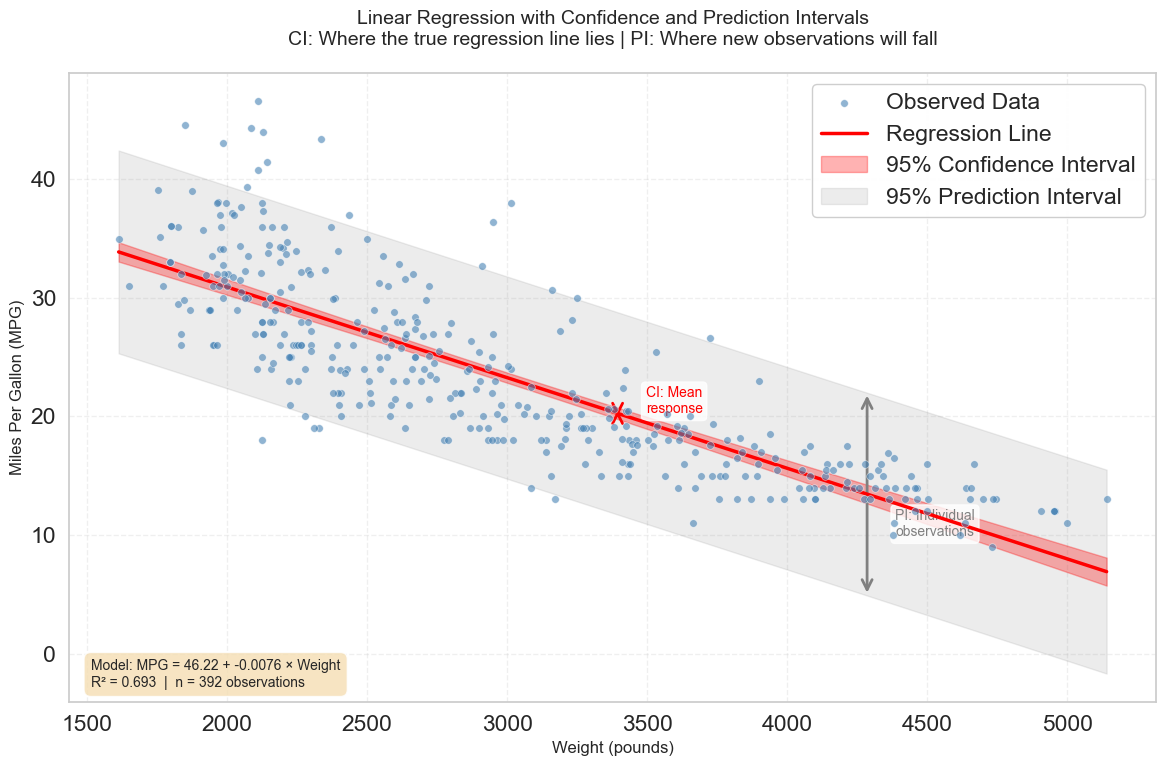

Interval Comparison at Weight = 3000 lbs
Predicted MPG: 23.3
95% Confidence Interval: [22.8, 23.7] (width: 0.9)
95% Prediction Interval: [14.7, 31.8] (width: 17.1)
PI is 19.8× wider than CI


In [8]:
import statsmodels.api as sm

# Prepare the data
x_data = data["weight"].values
y_data = data["mpg"].values

# Fit the model
X = sm.add_constant(x_data)  # Add intercept column
model = sm.OLS(y_data, X).fit()

# Create prediction range
x_pred = np.linspace(x_data.min(), x_data.max(), 100)
X_pred = sm.add_constant(x_pred)

# Get predictions with both intervals
predictions = model.get_prediction(X_pred)
pred_summary = predictions.summary_frame(alpha=0.05)

# Extract the intervals
y_pred = pred_summary["mean"]
confidence_lower = pred_summary["mean_ci_lower"]
confidence_upper = pred_summary["mean_ci_upper"]
prediction_lower = pred_summary["obs_ci_lower"]
prediction_upper = pred_summary["obs_ci_upper"]

# Create a single comprehensive plot
plt.figure(figsize=(12, 8))

# Layer 1: Prediction interval (widest, most subtle)
plt.fill_between(x_pred, prediction_lower, prediction_upper,
                 alpha=0.15, color="gray",
                 label="95% Prediction Interval")

# Layer 2: Confidence interval (narrower, more visible)
plt.fill_between(x_pred, confidence_lower, confidence_upper,
                 alpha=0.3, color="red",
                 label="95% Confidence Interval")

# Layer 3: Regression line
plt.plot(x_pred, y_pred, color="red", linewidth=2.5,
         label="Regression Line", zorder=4)

# Layer 4: Scatter plot of actual data (on top)
plt.scatter(x_data, y_data, alpha=0.6, s=30, color="steelblue",
            label="Observed Data", zorder=5, edgecolors="white", linewidth=0.5)

# Annotations to explain the intervals
mid_idx = len(x_pred) // 2
# Annotate CI
plt.annotate("", xy=(x_pred[mid_idx], confidence_lower.iloc[mid_idx]),
             xytext=(x_pred[mid_idx], confidence_upper.iloc[mid_idx]),
             arrowprops=dict(arrowstyle="<->", color="red", lw=2))
plt.text(x_pred[mid_idx] + 100, y_pred.iloc[mid_idx],
         "CI: Mean\nresponse", fontsize=10, color="red",
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Annotate PI
right_idx = int(len(x_pred) * 0.75)
plt.annotate("", xy=(x_pred[right_idx], prediction_lower.iloc[right_idx]),
             xytext=(x_pred[right_idx], prediction_upper.iloc[right_idx]),
             arrowprops=dict(arrowstyle="<->", color="gray", lw=2))
plt.text(x_pred[right_idx] + 100, prediction_lower.iloc[right_idx] + 5,
         "PI: Individual\nobservations", fontsize=10, color="gray",
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Labels and title
plt.xlabel("Weight (pounds)", fontsize=12)
plt.ylabel("Miles Per Gallon (MPG)", fontsize=12)
plt.title("Linear Regression with Confidence and Prediction Intervals\n" +
          "CI: Where the true regression line lies | PI: Where new observations will fall",
          fontsize=14, pad=20)

# Grid for readability
plt.grid(True, alpha=0.3, linestyle="--")

# Legend with custom ordering
handles, labels = plt.gca().get_legend_handles_labels()
order = [3, 2, 1, 0]  # Reorder to show from narrowest to widest
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order],
           loc="upper right", framealpha=0.95)

# Add model statistics box
textstr = f"Model: MPG = {model.params[0]:.2f} + {model.params[1]:.4f} × Weight\n"
textstr += f"R² = {model.rsquared:.3f}  |  n = {len(x_data)} observations"
plt.text(0.02, 0.02, textstr, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment="bottom",
         bbox=dict(boxstyle="round,pad=0.5", facecolor="wheat", alpha=0.8))

plt.tight_layout()
plt.show()

# Print numerical comparison at a specific weight
test_weight = 3000
test_idx = np.argmin(np.abs(x_pred - test_weight))
ci_width = confidence_upper.iloc[test_idx] - confidence_lower.iloc[test_idx]
pi_width = prediction_upper.iloc[test_idx] - prediction_lower.iloc[test_idx]

print("="*60)
print(f"Interval Comparison at Weight = {test_weight} lbs")
print("="*60)
print(f"Predicted MPG: {y_pred.iloc[test_idx]:.1f}")
print(f"95% Confidence Interval: [{confidence_lower.iloc[test_idx]:.1f}, {confidence_upper.iloc[test_idx]:.1f}] (width: {ci_width:.1f})")
print(f"95% Prediction Interval: [{prediction_lower.iloc[test_idx]:.1f}, {prediction_upper.iloc[test_idx]:.1f}] (width: {pi_width:.1f})")
print(f"PI is {pi_width/ci_width:.1f}× wider than CI")

### Matrix Formulation of Linear Regression

#### Why Matrix Notation?

Matrix notation provides a compact and elegant way to express linear regression, especially for multiple variables. It also makes computations more efficient and reveals the underlying linear algebra.

#### The Model in Matrix Form

For n observations and p predictors, we can write:
$$\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}$$

Where:
- $\mathbf{y}$ is an n×1 vector of responses
- $\mathbf{X}$ is an n×(p+1) design matrix (including a column of 1s for the intercept)
- $\boldsymbol{\beta}$ is a (p+1)×1 vector of coefficients
- $\boldsymbol{\epsilon}$ is an n×1 vector of errors

#### The Normal Equation

The least squares solution is:
$$\hat{\boldsymbol{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

This formula comes from minimizing the sum of squared errors:
$$SSE = (\mathbf{y} - \mathbf{X}\boldsymbol{\beta})^T(\mathbf{y} - \mathbf{X}\boldsymbol{\beta})$$

#### Variance-Covariance Matrix

The variance-covariance matrix of the coefficients is:
$$\text{Var}(\hat{\boldsymbol{\beta}}) = \sigma^2(\mathbf{X}^T\mathbf{X})^{-1}$$

The diagonal elements give us the variances (and thus standard errors) of each coefficient.

#### Implementation

Below we implement the matrix formulation for our simple linear regression:


In [9]:
# Linear regression using matrix formulation
# This demonstrates the underlying linear algebra of regression

# Construct the design matrix X
# First column: all 1s for the intercept term
# Second column: the predictor variable (weight)
X = np.hstack(
    (np.ones(shape=(len(data["weight"]), 1)),  # Column of 1s for intercept
     np.array(data["weight"]).reshape(-1, 1))  # Predictor variable as column vector
)

print("Design Matrix X shape:", X.shape)
print("First 5 rows of X:")
print(X[:5])

y = data["mpg"]

# Calculate coefficients using the Normal Equation
# β = (X'X)^(-1) X'y
# This gives us the least squares solution
XtX = X.T @ X  # X transpose times X
XtX_inv = np.linalg.inv(XtX)  # Inverse of X'X
Xty = X.T @ y  # X transpose times y
beta_matrix = XtX_inv @ Xty

print("\n" + "="*50)
print("Coefficient Estimates (Matrix Method)")
print("="*50)
print(f"β₀ (Intercept): {beta_matrix[0]:.4f}")
print(f"β₁ (Slope): {beta_matrix[1]:.6f}")


# Calculate variance-covariance matrix
# Var(β) = σ² (X'X)^(-1)
# Where σ² is the residual variance
sigma_squared = np.var(residual, ddof=2)
var_cov_matrix = sigma_squared * XtX_inv

# Extract standard errors (square root of diagonal elements)
se_matrix = np.sqrt(np.diag(var_cov_matrix))

print("\n" + "="*50)
print("Standard Errors (Matrix Method)")
print("="*50)
print(f"SE(β₀): {se_matrix[0]:.4f}")
print(f"SE(β₁): {se_matrix[1]:.6f}")

# Display the full variance-covariance matrix
print("\n" + "="*50)
print("Variance-Covariance Matrix")
print("="*50)
print(var_cov_matrix)
print("\nNote: Diagonal elements are variances, off-diagonal are covariances")

Design Matrix X shape: (392, 2)
First 5 rows of X:
[[1.000e+00 3.504e+03]
 [1.000e+00 3.693e+03]
 [1.000e+00 3.436e+03]
 [1.000e+00 3.433e+03]
 [1.000e+00 3.449e+03]]

Coefficient Estimates (Matrix Method)
β₀ (Intercept): 46.2165
β₁ (Slope): -0.007647

Standard Errors (Matrix Method)
SE(β₀): 0.7987
SE(β₁): 0.000258

Variance-Covariance Matrix
[[ 6.37877704e-01 -1.98143497e-04]
 [-1.98143497e-04  6.65450529e-08]]

Note: Diagonal elements are variances, off-diagonal are covariances


## Multiple Linear Regression

### What is Multiple Regression?

Multiple linear regression extends simple linear regression by incorporating multiple independent variables (features) to explain the variation in the dependent variable. This allows us to improve the prediction accuracy by considering more information.

### The Model

The multiple linear regression model is:
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p + \epsilon$$

Where:
- $y$ is the dependent variable
- $x_1, x_2, ..., x_p$ are the p independent variables
- $\beta_0$ is the intercept
- $\beta_1, \beta_2, ..., \beta_p$ are the coefficients for each predictor
- $\epsilon$ is the error term

### Interpretation of Coefficients

In multiple regression, each coefficient represents the **partial effect** of that variable:
- $\beta_i$ is the change in $y$ for a one-unit change in $x_i$, **holding all other variables constant**
- This is different from simple regression where we don't control for other variables

### Challenges in Multiple Regression

1. **Multicollinearity**: When predictors are highly correlated with each other
   - Makes coefficients unstable (large standard errors)
   - Difficult to interpret individual effects
   - Can be detected using VIF (Variance Inflation Factor)

2. **Overfitting**: Adding too many predictors relative to sample size
   - Model fits training data too well but generalizes poorly
   - Use adjusted R² instead of R² to account for number of predictors


### Adjusted R-squared

When comparing models with different numbers of predictors, use adjusted R²:
$$R^2_{adj} = 1 - \frac{(1-R^2)(n-1)}{n-p-1}$$

This penalizes adding predictors that don't improve the model significantly.

### Implementation

Below we'll use `statsmodels` to fit a multiple regression model with several engine-related predictors:

In [10]:
# Fit a multiple linear regression model with several predictors
# Formula: mpg = β₀ + β₁*weight + β₂*displacement + β₃*horsepower + β₄*acceleration + ε

# Define the model using formula notation
# The + signs indicate additive effects (no interactions)
model_2 = smf.ols(formula="mpg ~ weight + displacement + horsepower + acceleration", data=data)

# Fit the model
result_2 = model_2.fit()

# Display the results
print("="*70)
print("MULTIPLE LINEAR REGRESSION RESULTS")
print("="*70)
print(result_2.summary())

# Extract and interpret key statistics
print("\n" + "="*70)
print("KEY INSIGHTS FROM THE MODEL")
print("="*70)

# R-squared comparison
r2_simple = result_1.rsquared  # From our simple regression with weight only
r2_multiple = result_2.rsquared
r2_adj = result_2.rsquared_adj

print(f"R² improvement from simple to multiple regression:")
print(f"  Simple (weight only): {r2_simple:.3f}")
print(f"  Multiple (4 predictors): {r2_multiple:.3f}")
print(f"  Adjusted R²: {r2_adj:.3f}")
print(f"  Improvement: {(r2_multiple - r2_simple)*100:.1f}%")

# Significant predictors (p < 0.05)
print(f"\nSignificant Predictors (p < 0.05):")
for param, pvalue in result_2.pvalues.items():
    if pvalue < 0.05 and param != "Intercept":
        coef = result_2.params[param]
        print(f"  - {param}: β = {coef:.4f}, p = {pvalue:.4f}")

# Non-significant predictors
print(f"\nNon-Significant Predictors (p >= 0.05):")
for param, pvalue in result_2.pvalues.items():
    if pvalue >= 0.05 and param != "Intercept":
        coef = result_2.params[param]
        print(f"  - {param}: β = {coef:.4f}, p = {pvalue:.4f}")

MULTIPLE LINEAR REGRESSION RESULTS
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     233.4
Date:                Wed, 24 Sep 2025   Prob (F-statistic):          9.63e-102
Time:                        21:58:30   Log-Likelihood:                -1120.6
No. Observations:                 392   AIC:                             2251.
Df Residuals:                     387   BIC:                             2271.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    

### Checking for Multicollinearity

Let's examine the correlation matrix of our continuous variables:

Correlation Matrix of Continuous Variables:
              weight  displacement  horsepower  acceleration
weight         1.000         0.933       0.865        -0.417
displacement   0.933         1.000       0.897        -0.544
horsepower     0.865         0.897       1.000        -0.689
acceleration  -0.417        -0.544      -0.689         1.000


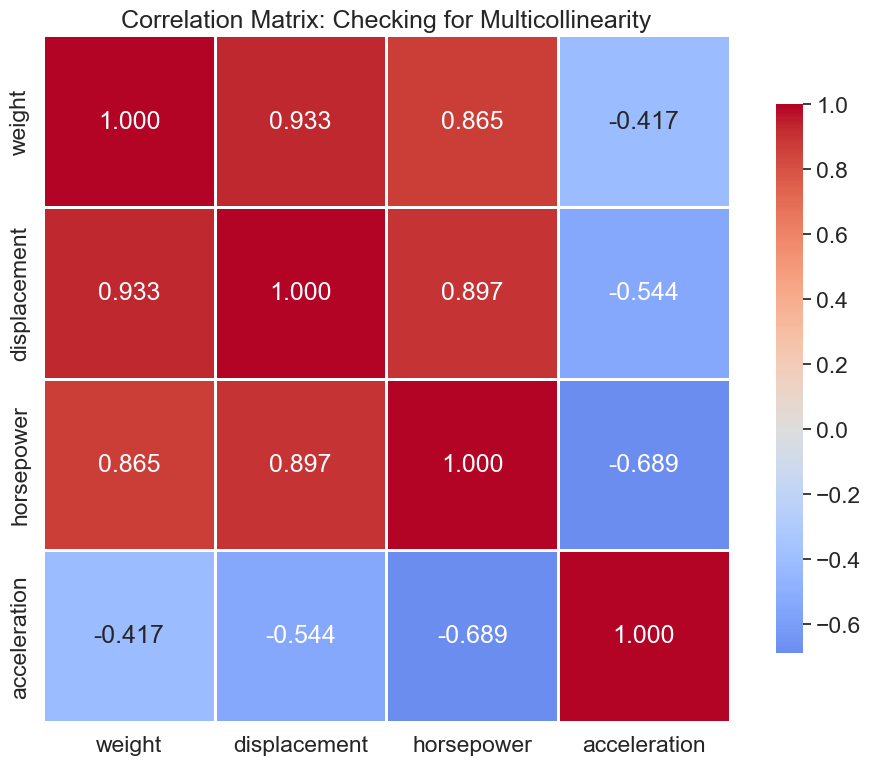


High Correlations (|r| > 0.7):
weight <-> displacement: 0.933
weight <-> horsepower: 0.865
displacement <-> horsepower: 0.897


In [11]:
# Check for multicollinearity by examining correlations between predictors
# High correlations (> 0.7 or < -0.7) indicate potential multicollinearity issues

# Calculate correlation matrix for continuous variables
continuous_variables = ["weight", "displacement", "horsepower", "acceleration"]
correlation_matrix = data[continuous_variables].corr()

# Display the correlation matrix
print("Correlation Matrix of Continuous Variables:")
print("="*60)
print(correlation_matrix.round(3))

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap="coolwarm",
            center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix: Checking for Multicollinearity")
plt.tight_layout()
plt.show()

# Identify high correlations (excluding diagonal)
print("\n" + "="*60)
print("High Correlations (|r| > 0.7):")
print("="*60)
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            print(f"{var1} <-> {var2}: {corr_value:.3f}")